In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')
print(df.head())
print(df.shape)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)


In [3]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [4]:
numeric_col=df.select_dtypes(include=['int64','float64']).columns
print(numeric_col)
cat_col=df.select_dtypes(include=['object','category','bool']).columns
print(cat_col)

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [5]:
print(df.isnull().sum())
missing_percent=df.isnull().mean()*100
print(missing_percent)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [6]:
df[numeric_col].describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df[numeric_col].skew()

,0
survived,0.478523
pclass,-0.630548
age,0.389108
sibsp,3.695352
parch,2.749117
fare,4.787317


In [9]:
# Calculate Q1, Q3, and IQR for the 'fare' column as an example
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate Lower Bound and Upper Bound with corrected variable names
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 for 'fare': {Q1}")
print(f"Q3 for 'fare': {Q3}")
print(f"IQR for 'fare': {IQR}")
print(f"Lower Bound for 'fare': {lower_bound}")
print(f"Upper Bound for 'fare': {upper_bound}")

Q1 for 'fare': 7.9104
Q3 for 'fare': 31.0
IQR for 'fare': 23.0896
Lower Bound for 'fare': -26.724
Upper Bound for 'fare': 65.6344


In [8]:
for col in cat_col:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n" + "-"*30 + "\n")

Value counts for column: sex
sex
male      577
female    314
Name: count, dtype: int64

------------------------------

Value counts for column: embarked
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

------------------------------

Value counts for column: class
class
Third     491
First     216
Second    184
Name: count, dtype: int64

------------------------------

Value counts for column: who
who
man      537
woman    271
child     83
Name: count, dtype: int64

------------------------------

Value counts for column: adult_male
adult_male
True     537
False    354
Name: count, dtype: int64

------------------------------

Value counts for column: deck
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

------------------------------

Value counts for column: embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

------------------------------

Value counts for column: alive
aliv

In [10]:
def univariate_numeric_summary(df,col):
  Q1=df[col].quantile(0.25)
  Q2=df[col].quantile(0.50)
  Q3=df[col].quantile(0.75)
  IQR= Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  mean=df[col].mean()

  if mean > Q2:
    skew='Right skew'
  elif mean < Q2:
    skew='Left skew'
  else:
    skew='Normal'

  outlier= df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outlier_count=len(outlier)
  print(f"Column:{col}")
  print(f"Outlier:{outlier_count}")
  print(f"Skew: {skew}")
for col in numeric_col:
    univariate_numeric_summary(df, col)

Column:survived
Outlier:0
Skew: Right skew
Column:pclass
Outlier:0
Skew: Left skew
Column:age
Outlier:11
Skew: Right skew
Column:sibsp
Outlier:46
Skew: Right skew
Column:parch
Outlier:213
Skew: Right skew
Column:fare
Outlier:116
Skew: Right skew


In [11]:
def univariate_cat_summary(df,col):
  print(f"Column:{col}")
  count=df[col].value_counts()
  print(f"Count:\n{count}")

  percents = df[col].value_counts(normalize=True) * 100
  print("\nPercentage:")
  print(percents.round(2))

  rare = percents[percents < 5]
  if not rare.empty:
      print("\nRare categories (<5% of total):")
      print(rare)
  else:
      print("\nNo rare categories")
  print("-"*50)

for col in cat_col:
    univariate_cat_summary(df, col)

Column:sex
Count:
sex
male      577
female    314
Name: count, dtype: int64

Percentage:
sex
male      64.76
female    35.24
Name: proportion, dtype: float64

No rare categories
--------------------------------------------------
Column:embarked
Count:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Percentage:
embarked
S    72.44
C    18.90
Q     8.66
Name: proportion, dtype: float64

No rare categories
--------------------------------------------------
Column:class
Count:
class
Third     491
First     216
Second    184
Name: count, dtype: int64

Percentage:
class
Third     55.11
First     24.24
Second    20.65
Name: proportion, dtype: float64

No rare categories
--------------------------------------------------
Column:who
Count:
who
man      537
woman    271
child     83
Name: count, dtype: int64

Percentage:
who
man      60.27
woman    30.42
child     9.32
Name: proportion, dtype: float64

No rare categories
--------------------------------------------------
Column:ad

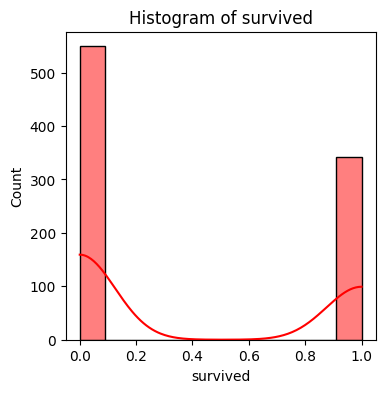

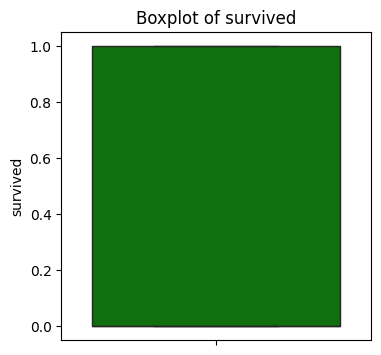

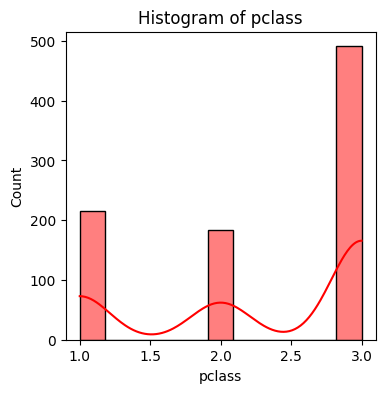

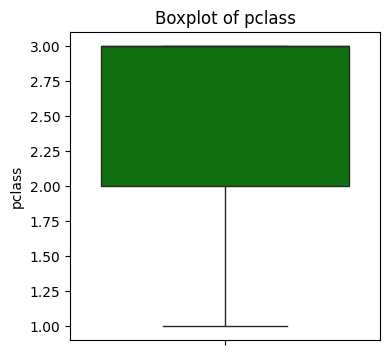

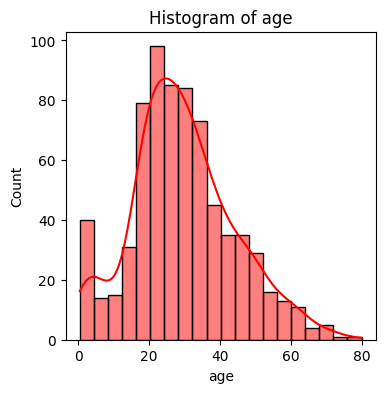

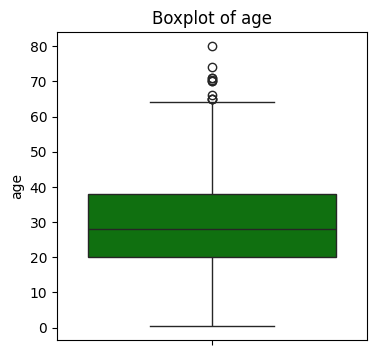

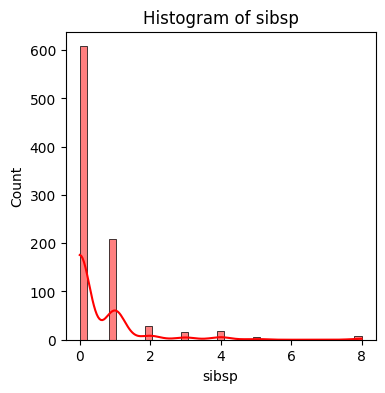

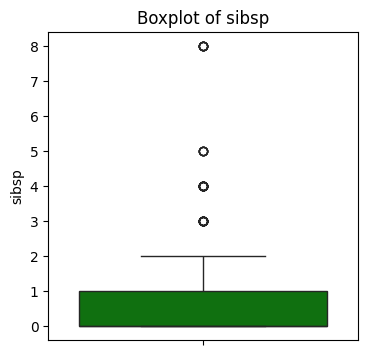

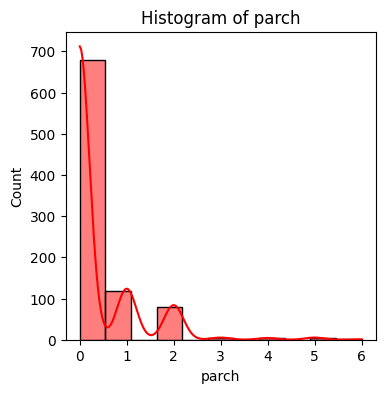

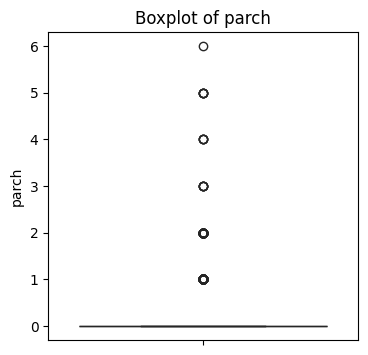

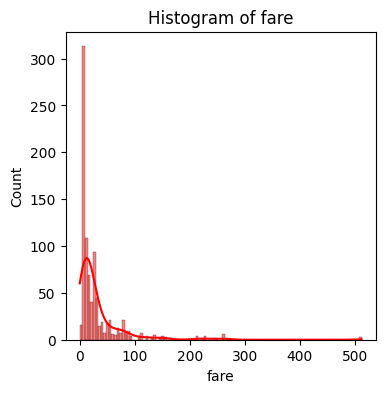

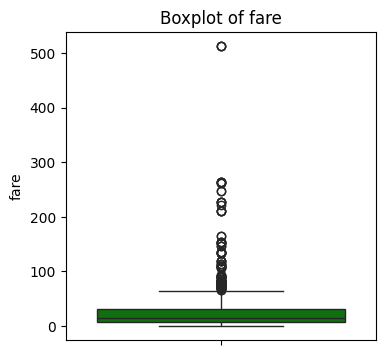

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


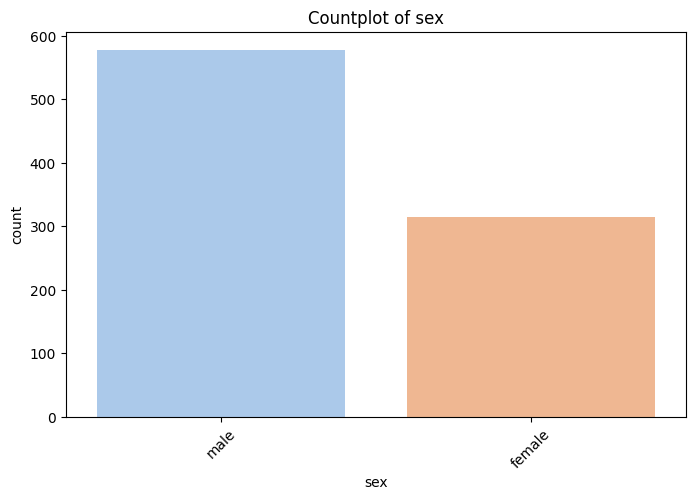

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


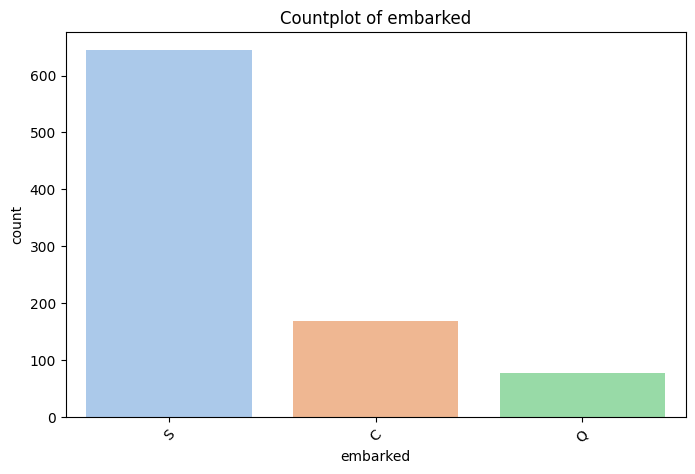

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


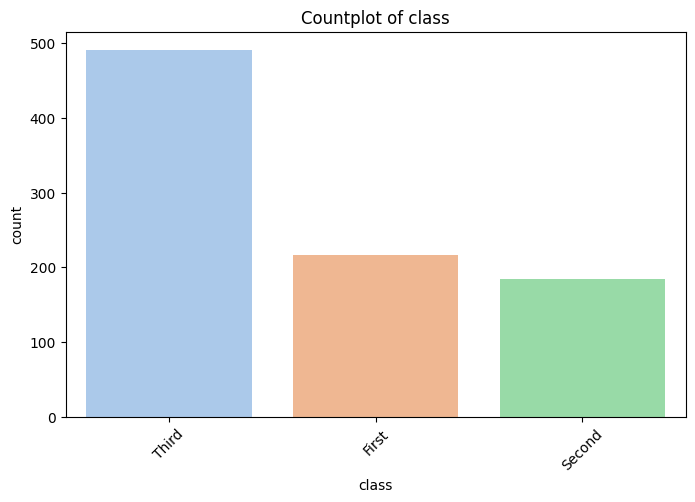

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


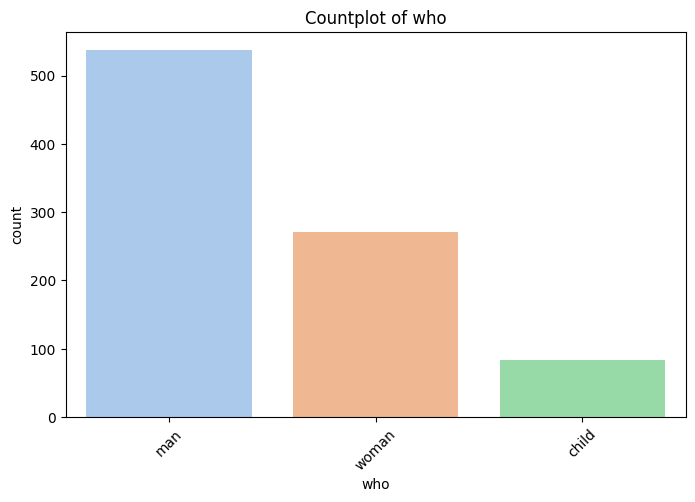

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


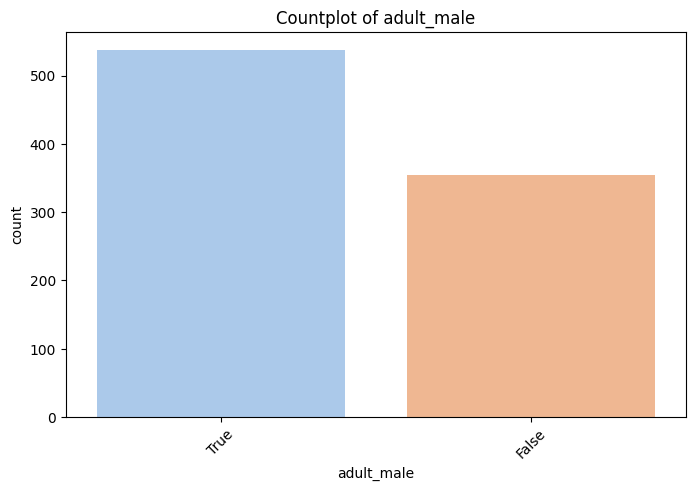

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


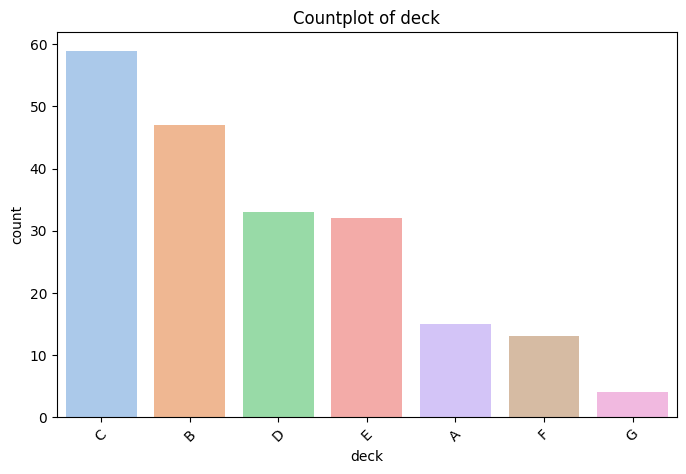

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


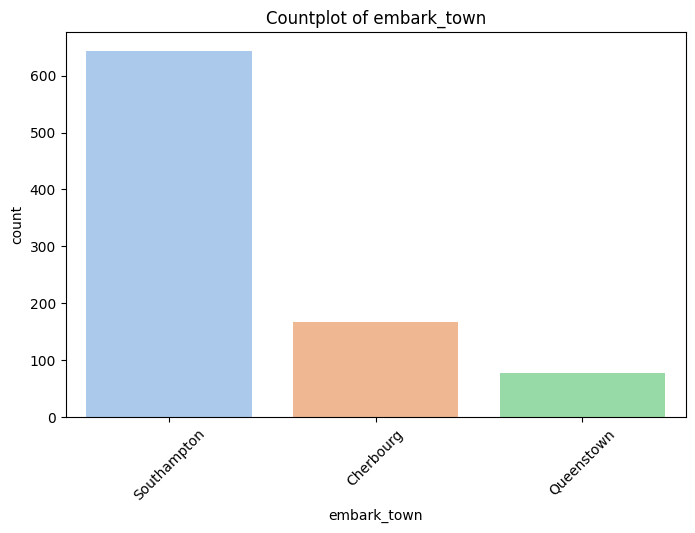

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


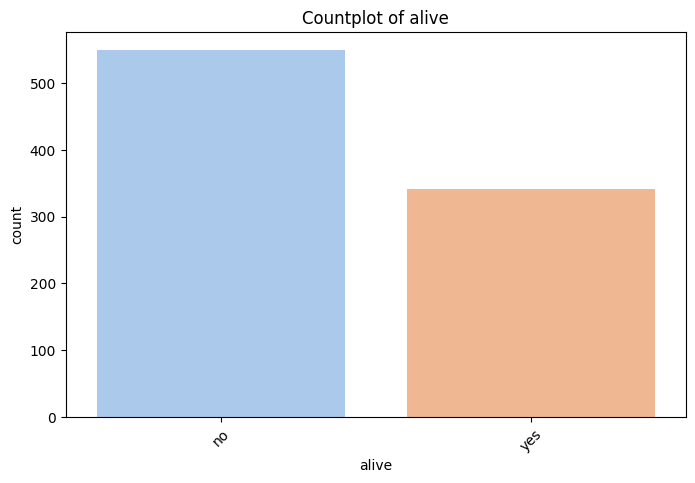

/tmp/ipython-input-3258428462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)


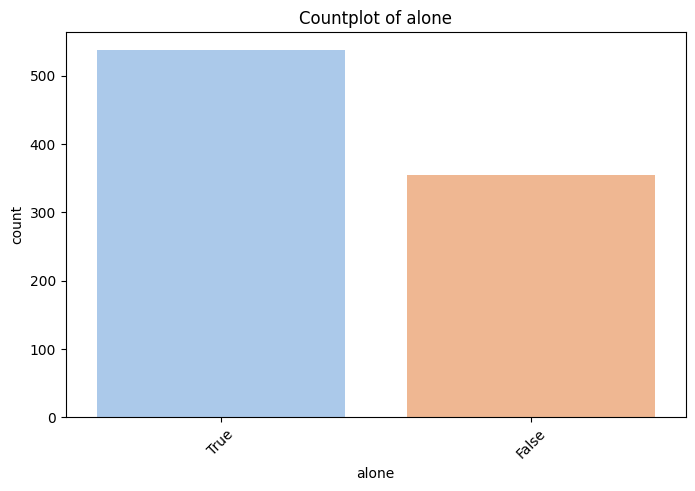

In [12]:
for col in numeric_col:
  # Histogram
  plt.figure(figsize=(4,4))
  sns.histplot(df[col],kde=True,color='red')
  plt.title(f"Histogram of {col}")
  plt.show()

  # Boxplot
  plt.figure(figsize=(4,4))
  sns.boxplot(df[col],color='green')
  plt.title(f"Boxplot of {col}")
  plt.show()

for col in cat_col:
  plt.figure(figsize=(8,5))
  sns.countplot(data=df,x=col,palette='pastel',order=df[col].value_counts().index)
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45)
  plt.show()

In [14]:
df['Family']=df['sibsp']+df['parch']+1
df['Alone'] = (df['Family'] == 1).astype(int)
df['age'] = df['age'].fillna(df['age'].median())
df['AgeGroup'] = pd.cut(df['age'], bins=[0,12,18,35,60,100],
                        labels=['Child','Teen','Adult','MidAge','Senior'])

if df['sex'].dtype == 'object':
    df['sex'] = df['sex'].map({'male':0, 'female':1})

if 'embark_town' in df.columns:
    df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

columns_to_dummy = ['embarked','deck','AgeGroup', 'class', 'who', 'adult_male', 'embark_town', 'alive']

existing_columns_to_dummy = [col for col in columns_to_dummy if col in df.columns]

if existing_columns_to_dummy:
    df = pd.get_dummies(df, columns=existing_columns_to_dummy, drop_first=True)

In [16]:
df=df.loc[:,~df.columns.duplicated()]

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,Family,Alone,...,AgeGroup_MidAge,AgeGroup_Senior,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,0,22.0,1,0,7.2500,False,2,0,...,False,False,False,True,True,False,True,False,True,False
1,1,1,1,38.0,1,0,71.2833,False,2,0,...,True,False,False,False,False,True,False,False,False,True
2,1,3,1,26.0,0,0,7.9250,True,1,1,...,False,False,False,True,False,True,False,False,True,True
3,1,1,1,35.0,1,0,53.1000,False,2,0,...,False,False,False,False,False,True,False,False,True,True
4,0,3,0,35.0,0,0,8.0500,True,1,1,...,False,False,False,True,True,False,True,False,True,False


In [18]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
alone,0
Family,0
Alone,0


In [19]:
x = df.drop('survived', axis=1)
y = df['survived']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

